# CS9860 Assignment 1 Predicting Survival on Titanic
<img src = "https://upload.wikimedia.org/wikipedia/commons/thumb/f/fd/RMS_Titanic_3.jpg/800px-RMS_Titanic_3.jpg" width=600>

This assignment is based on the predicition of the idividuals on board of the titanic. The dataset used is from a Kaggle competition.

In [1]:
# data analysis and data wrangling libraries 
import pandas as pd
import numpy as np
import random as rnd

# data visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning imports
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV

#random
from scipy.stats import randint

**Data Insights**

The Python Pandas packages is used to work with the datasets (both test and train groups). We start by acquiring the training and testing datasets into Pandas DataFrames. Then we will use Pandas for data manipulation.

In [2]:
#import test data
test_df = pd.read_csv("test.csv")
#import train data
train_df = pd.read_csv("train.csv")

In [3]:
print(train_df.columns.values)
# Display the first 5 rows of the train dataset
train_df.head()

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Display the last 5 rows of the train dataset
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
# Display any null features
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

The above preview shows us the type of features within the dataset as well as weather the features are categorical or numerical. There are also some null values within the tail segment of this dataset (Age, Embarked and Cabin column). There seems to be a mixture of numerical and textual values in the ticket column. We can further know about the datatypes and non-null.null values by using Pandas to print info() on both test and train groups.

In [6]:
print("Train Data Info")
train_df.info()
train_df.shape
print("Test Data Info")
test_df.info()

Train Data Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
Test Data Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 no

Based on the data we have from the kaggle challenge, the titinic had 2224 passengers and crew. The training dataset we have has 891 counts of passengers which equates to about 40.06% of the actual number of passengers on board the Titanic.

In [7]:
# Display count based on gender
train_df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [8]:
# Display survived and non-survived count
train_df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

***Data Visualization***

<AxesSubplot:>

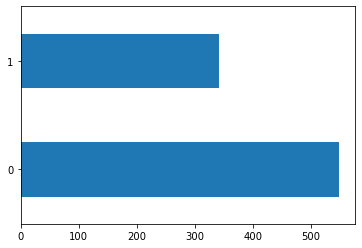

In [9]:
# Visualize survived and non-survived in a bar graph
train_df.Survived.value_counts().plot.barh()

Here we find out that 342 individuals survived (Survived is a categorical feature with 0 or 1 values). We can further examine the data in terms of survival rate by gender. We can plot to visualize the data to discover more insights below.

In [10]:
#Use pandas to creaete a crosstab between survival rate by gender (count)
pd.crosstab(train_df["Survived"],train_df["Sex"])

Sex,female,male
Survived,,
0,81,468
1,233,109


<AxesSubplot:xlabel='Sex', ylabel='Count'>

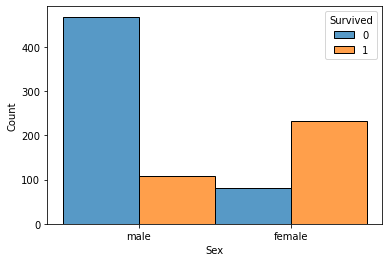

In [11]:
# Visualize survived and non-survived alogn with gender (individually) using a histogram
sns.histplot(data=train_df, x=train_df["Sex"], hue="Survived", multiple="dodge")

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

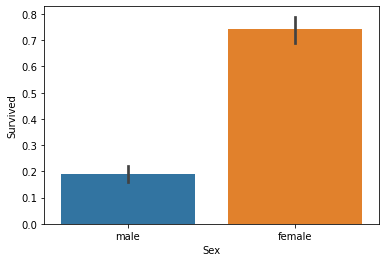

In [12]:
# Visualize survived and non-survived alogn with gender using a histogram
sns.barplot(data=train_df,x='Sex', y='Survived')

We can see that the Survival rate among females was significantly higher (233 out of 314) as compared to male (109 out of 577). Furthermore, we can now look into the age groups of the passngers and crew present on the titanic.

<AxesSubplot:xlabel='Age', ylabel='Count'>

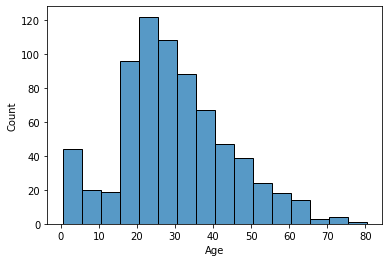

In [13]:
# Visualize age range using a histogram
sns.histplot(data=train_df, x=train_df["Age"], binwidth=5 )

The above histogram shows us that the majority of individuals on board of the titanic were betweent he ages range of 15 and 45 with a very few elderly individuals. 

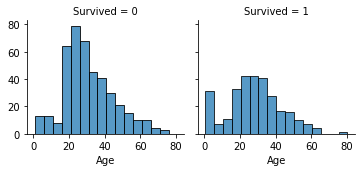

In [14]:
# Visualize survived and non-survived using a histogram for different age ranges
g = sns.FacetGrid(train_df, col="Survived", height=2.5, col_wrap=3)
g.map(sns.histplot, "Age", bins=20, binwidth = 5)

The above histogram shows us that amongst the survivours, majority of infants and a vriety of age ranges survived. 

We can now look into another feture of the dataset, this feature is Pclass, there were a total of 3  Pclass (or passenger class). The below mentioned shows us that most passengers in Pclass 1 survived, followed by Pclass 2 and then followed by pclass 3.

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

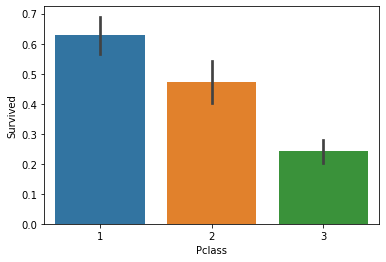

In [15]:
# Visualize survived and non-survived alogn with Pclass
sns.barplot(data=train_df, x=train_df["Pclass"], y="Survived")

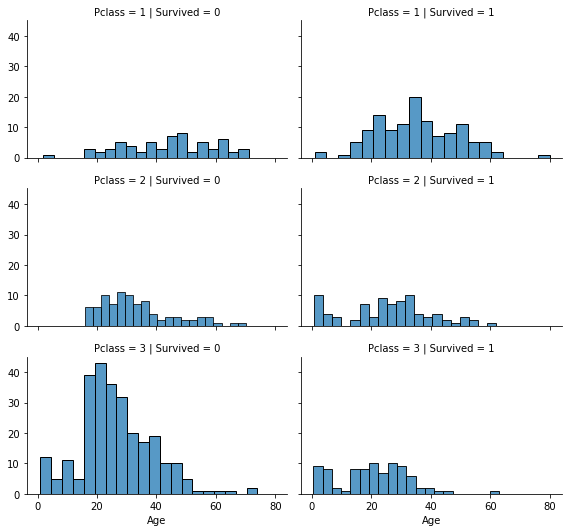

In [16]:
# Visualize survived and non-survived alogn with all three Pclasses usign a histogram
g = sns.FacetGrid(train_df, col='Survived', row='Pclass', height=2.5, aspect=1.6)
g.map(sns.histplot, 'Age', bins=20)

We can further visualise the data into different histograms for Pclasses as well as age. We can note that while correlating numerical and ordinal features, the Pclass 3 had most number of individuals, unfortunately, most individuals from the age rang of 15 to 50 did not survive.

***Feature Correlation***

In [17]:
train_df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:648: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


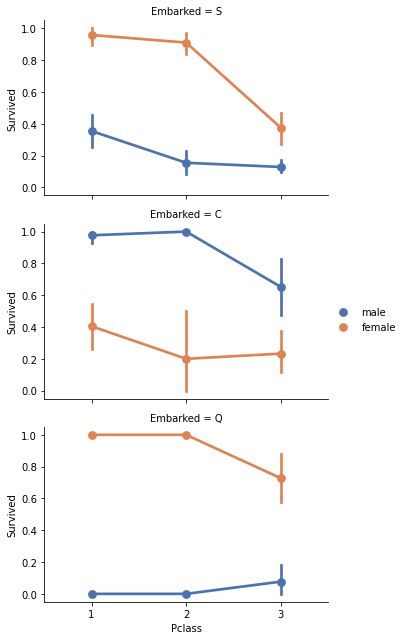

In [18]:
# Visualize survived and non-survived alogn with Embarked
g = sns.FacetGrid(train_df, row='Embarked', height= 3, size = 3, aspect=1.6)
g.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
g.add_legend()

There were three embankment points, Q, S and C. Now we can correlate categorical features. The above described point plot shows us that male individuals from embankment point C had a higher chance of survival where as female indiviiduals had a better chance of survivial with embankment points Q and S. Females from Pclass 3 and embankment Q and S had less chance of survival as comapred to the other two Pclasses, and, males from Pclass 3 and embankment C had less chance of survival as comapred to the other two Pclasses. 

**Preparing the Data**

As denoted when comparing the different datatypes, we found out that ticket feature had mixed values and cabin had missing vlaues, as well as the name feature is insignificant. There values are insignificant to the survival rate based on out understanding of the dataset. Therefore, we can drop these three features from the dataset.

In [19]:
#We can delete the two features, Ticket and Cabin
datasets = [train_df,test_df]
train_df = train_df.drop(['Ticket', 'Cabin','Name'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin','Name'], axis=1)


In [20]:
#Confirm the change
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [21]:
#function to fidn the % of missing values
def get_missing_value_details(data_frame):
    total = data_frame.isnull().sum().sort_values(ascending=False)
    percent_1 = data_frame.isnull().sum()/data_frame.isnull().count()*100
    percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
    missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
    return missing_data
missing_values = get_missing_value_details(train_df)
missing_values.head()

,Total,%
Age,177,19.9
Embarked,2,0.2
PassengerId,0,0.0
Survived,0,0.0
Pclass,0,0.0


**Feature Engineering**

We can start off with the Embarkment feature, here we know from the data analysis, that majority of individuals baorded via the S Emarkment. Thus it is safe to assume, that we can replace the missing values in the Embarked feature with S.

In [22]:
# replace the missing values in the Embarked feature with S.
train_df = train_df.fillna({"Embarked": "S"})
test_df = test_df.fillna({"Embarked": "S"})

In [23]:
# replacing the missing values in the Age feature.
train_df = train_df.fillna({"Age": train_df['Age'].median()})
test_df = test_df.fillna({"Age": test_df['Age'].median()})

In [24]:
# verify replacing the missing values in the Embarked feature with S.
missing_values = get_missing_value_details(train_df)
missing_values.head()

,Total,%
PassengerId,0,0.0
Survived,0,0.0
Pclass,0,0.0
Sex,0,0.0
Age,0,0.0


The above values show that some values for fare are missing in the test set, we can fill those in using median values (as done below).

In [25]:
#one last time, we can verify that there are no missing values in the test set
missing_values = get_missing_value_details(test_df)
missing_values.head()

,Total,%
Fare,1,0.2
PassengerId,0,0.0
Pclass,0,0.0
Sex,0,0.0
Age,0,0.0


In [26]:
test_df = test_df.fillna({"Fare": test_df['Fare'].median()})

In [27]:
# verify replacing the missing values in the Age feature.
train_df.tail()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
886,887,0,2,male,27.0,0,0,13.00,S
887,888,1,1,female,19.0,0,0,30.00,S
888,889,0,3,female,28.0,1,2,23.45,S
889,890,1,1,male,26.0,0,0,30.00,C
890,891,0,3,male,32.0,0,0,7.75,Q


The above table shows us that most of the features look on par with what we require. We can now convert the Sex and Embarked feature into numerical values.

In [28]:
#map each Sex value to a numerical value
train_df['Sex'] = train_df['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
test_df['Sex'] = test_df['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
#verify the change
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,S
1,2,1,1,1,38.0,1,0,71.2833,C
2,3,1,3,1,26.0,0,0,7.9250,S
3,4,1,1,1,35.0,1,0,53.1000,S
4,5,0,3,0,35.0,0,0,8.0500,S


The values of Embarked can be converted to numberical values. This may be done via one hot encoding, however, to keep the features to a minimum, we can convert them into numberical values, correlating to S:1,C:2,Q:3.

In [29]:
#map each Embarked value to a numerical value
train_df['Embarked'] = train_df['Embarked'].map( {"S": 1, "C": 2, "Q": 3} ).astype(int)
test_df['Embarked'] = test_df['Embarked'].map( {"S": 1, "C": 2, "Q": 3} ).astype(int)
#verify the change
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,1
1,2,1,1,1,38.0,1,0,71.2833,2
2,3,1,3,1,26.0,0,0,7.9250,1
3,4,1,1,1,35.0,1,0,53.1000,1
4,5,0,3,0,35.0,0,0,8.0500,1


In [30]:
#one last time, we can verify that there are no missing values
missing_values = get_missing_value_details(train_df)
missing_values.head()

,Total,%
PassengerId,0,0.0
Survived,0,0.0
Pclass,0,0.0
Sex,0,0.0
Age,0,0.0


The above table proves that there are no missing values, this is essential as out upcoming models require no null values.

**Modelling and evaluation**

In [31]:
#assigning features to the training and testing dataset
# Dataset to predict and list the features
X_train = train_df.drop(["Survived","PassengerId"], axis=1)
Y_train = train_df["Survived"]

X_test  = test_df.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 7), (891,), (418, 7))

We can verify that the shapes of the training data match our test dataset. ((891, 7), (891,), (418, 7)), the number of features match

**Modelling**

We can use Decision Trees to classify the dataset,this model uses a decision tree as a predictive model which maps features (tree branches) to conclusions about the target value (tree leaves). Tree models where the target variable can take a finite set of values are called classification trees; in these tree structures, leaves represent class labels and branches represent conjunctions of features that lead to those class labels. Decision trees where the target variable can take continuous values (typically real numbers) are called regression trees. [Decision tree learning](https://en.wikipedia.org/wiki/Decision_tree_learning)

In [32]:
# Decision Tree
decision_tree_model = DecisionTreeClassifier() # Decision Tree Classifer imported from sklearn
decision_tree_model.fit(X_train, Y_train)
Y_pred = decision_tree_model.predict(X_test)
decision_tree_accu = round(decision_tree_model.score(X_train,Y_train) * 100, 2)
print(decision_tree_accu)

output = pd.DataFrame({'PassengerId': test_df.PassengerId, 'Survived': Y_pred})
output.to_csv('decision_tree_fit.csv', index=False)

97.98


The Gaussian Naive Bayes classifiers are a family of simple probabilistic classifiers based on applying Bayes' theorem with strong (naive) independence assumptions between the features. Naive Bayes classifiers are highly scalable, requiring a number of parameters linear in the number of variables (features) in a learning problem. [Naive Bayes classifier](https://en.wikipedia.org/wiki/Naive_Bayes_classifier)

In [33]:
# Gaussian Naive Bayes
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, Y_train)
Y_pred_nb = naive_bayes_model.predict(X_test)

naive_bayes_accu = round(naive_bayes_model.score(X_train,Y_train) * 100, 2)
print(naive_bayes_accu)

output = pd.DataFrame({'PassengerId': test_df.PassengerId, 'Survived': Y_pred_nb})
output.to_csv('naive_bayes_fit.csv', index=False)

79.24


A multilayer perceptron (MLP), a simplest form of a neural network available in sklearn, is a class of feedforward artificial neural network (ANN). The term MLP is used ambiguously, sometimes loosely to mean any feedforward ANN, sometimes strictly to refer to networks composed of multiple layers of perceptrons. An MLP consists of at least three layers of nodes: an input layer, a hidden layer and an output layer. [Multilayer perceptron](https://en.wikipedia.org/wiki/Multilayer_perceptron)

In [34]:
# MLP Classifier
mlp_nn_model = MLPClassifier(hidden_layer_sizes=(15,), random_state=1, max_iter=1000, warm_start = True)
mlp_nn_model.fit(X_train, Y_train)
Y_pred_nn = mlp_nn_model.predict(X_test)

mlp_nn_accu = round(mlp_nn_model.score(X_train,Y_train) * 100, 2)
print(mlp_nn_accu)
output = pd.DataFrame({'PassengerId': test_df.PassengerId, 'Survived': Y_pred_nn})
output.to_csv('mlp_nn_fit.csv', index=False)

81.37


 Logistic regression measures the relationship between the categorical dependent variable (feature) and one or more independent variables (features) by estimating probabilities using a logistic function, which is the cumulative logistic distribution.[Logistic regression](https://en.wikipedia.org/wiki/Logistic_regression)

In [35]:
# Logistic Regression

lr_model = LogisticRegression()
lr_model.fit(X_train, Y_train)
Y_pred_lr = lr_model.predict(X_test)

lr_accu = round(lr_model.score(X_train, Y_train) * 100, 2)
print(lr_accu)

output = pd.DataFrame({'PassengerId': test_df.PassengerId, 'Survived': Y_pred_lr})
output.to_csv('lr_model_fit.csv', index=False)

80.13


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Evaluation**

All of the above models have an excellent prediction score, however, the Decision Tree classifier has the best possible score, scoring 97.98. This can be seen in the table below.

In [36]:
models = pd.DataFrame({
    'Model': ['Decision Tree', 'Gaussian Naive Bayes', 'MLP Classifier NN', 
              'Logistic Regression'],
    'Score': [decision_tree_accu, naive_bayes_accu, mlp_nn_accu, 
              lr_accu,]})
models.sort_values(by='Score', ascending=False)

,Model,Score
0,Decision Tree,97.98
2,MLP Classifier NN,81.37
3,Logistic Regression,80.13
1,Gaussian Naive Bayes,79.24


**Feature Importance**

We can optimise the model further by understanding the importance of all the features present. 

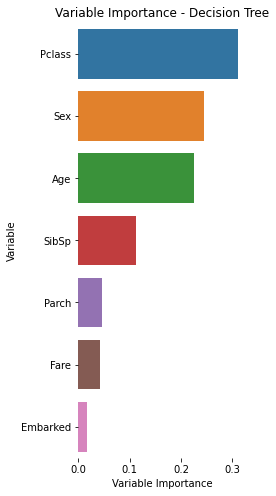

In [37]:
# Plot variable importance
importances = decision_tree_model.feature_importances_
indices = np.argsort(importances)[::-1] 

f, ax = plt.subplots(figsize=(3,8))
sns.barplot(y=X_train.columns,x=importances[indices],label="Total")
plt.title("Variable Importance - Decision Tree")
ax.set(ylabel="Variable",xlabel="Variable Importance")
sns.despine(left=True, bottom=True)
plt.show()

We can denote that the Embarked feature has the least amount of imporance when using the decision tree's models predicitons. We can try and hypertune our existing models by eleminating this feature, however, it may be possible that the models could perform poorly or the same as removing features directly affects the variance.

**Hyper Parameter Tuning**

We can drop the Embarked Feature and re run the models to find the optimal fit

In [38]:
#assigning features to the training and testing dataset
# Dataset to predict and list the features
X_train = train_df.drop(["Survived","PassengerId","Embarked"], axis=1)
Y_train = train_df["Survived"]

X_test  = test_df.drop(["PassengerId","Embarked"], axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 6), (891,), (418, 6))

In [39]:
# Decision Tree
# The Decision tree can be further tuned by using criterion='gini', max_depth= None, max_features=5,min_samples_leaf=10,min_samples_split=35
# however, we can see that the model performs better using using the default values.
decision_tree_model_ht = DecisionTreeClassifier(criterion='gini', max_depth= None, max_features=5,min_samples_leaf=10,min_samples_split=35) # Decision Tree Classifer imported from sklearn
decision_tree_model_ht.fit(X_train, Y_train)
Y_pred = decision_tree_model_ht.predict(X_test)
decision_tree_accu = round(decision_tree_model_ht.score(X_train,Y_train) * 100, 2)
print(decision_tree_accu)

output = pd.DataFrame({'PassengerId': test_df.PassengerId, 'Survived': Y_pred})
output.to_csv('decision_tree_fit_ht.csv', index=False)

86.42


In [40]:
# Gaussian Naive Bayes
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, Y_train)
Y_pred_nb = naive_bayes_model.predict(X_test)

naive_bayes_accu = round(naive_bayes_model.score(X_train,Y_train) * 100, 2)
print(naive_bayes_accu)

output = pd.DataFrame({'PassengerId': test_df.PassengerId, 'Survived': Y_pred_nb})
output.to_csv('naive_bayes_fit_ht.csv', index=False)

79.24


In [41]:
# MLP Classifier
mlp_nn_model = MLPClassifier(hidden_layer_sizes=(15,), random_state=1, max_iter=1000, warm_start = True)
mlp_nn_model.fit(X_train, Y_train)
Y_pred_nn = mlp_nn_model.predict(X_test)

mlp_nn_accu = round(mlp_nn_model.score(X_train,Y_train) * 100, 2)
print(mlp_nn_accu)
output = pd.DataFrame({'PassengerId': test_df.PassengerId, 'Survived': Y_pred_nn})
output.to_csv('mlp_nn_fit_ht.csv', index=False)

79.01


In [42]:
# Logistic Regression

lr_model = LogisticRegression()
lr_model.fit(X_train, Y_train)
Y_pred_lr = lr_model.predict(X_test)

lr_accu = round(lr_model.score(X_train, Y_train) * 100, 2)
print(lr_accu)

output = pd.DataFrame({'PassengerId': test_df.PassengerId, 'Survived': Y_pred_lr})
output.to_csv('lr_model_fit_ht.csv', index=False)

79.57


In [43]:
models = pd.DataFrame({
    'Model': ['Decision Tree', 'Gaussian Naive Bayes', 'MLP Classifier NN', 
              'Logistic Regression'],
    'Score': [decision_tree_accu, naive_bayes_accu, mlp_nn_accu, 
              lr_accu,]})
models.sort_values(by='Score', ascending=False)

,Model,Score
0,Decision Tree,86.42
3,Logistic Regression,79.57
1,Gaussian Naive Bayes,79.24
2,MLP Classifier NN,79.01


![Score](Score1.jpg)

Neural Network model performs quite well, with a score of 77% on Kaggle using the initial Decision tree Classisifer as the hypertuned versions performed poorly. This can be further optimised by using more feaatures (possibly one hot encoding).